In [2]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pandas as pd
import numpy as np


# plots a finite element mesh
def plot_fem_mesh(nodes_x, nodes_y, elements, linewidth: float = 0.2):
    # print(nodes_x)
    it = 0
    for element in elements:
        x = [nodes_x[element[0]], nodes_x[element[1]], nodes_x[element[2]]]
        y = [nodes_y[element[0]], nodes_y[element[1]], nodes_y[element[2]]]
        # print(x , y)
        plt.fill(x, y, edgecolor='black', linewidth = linewidth, fill=False)
        it += 1

<h1> Small cells (0.01)

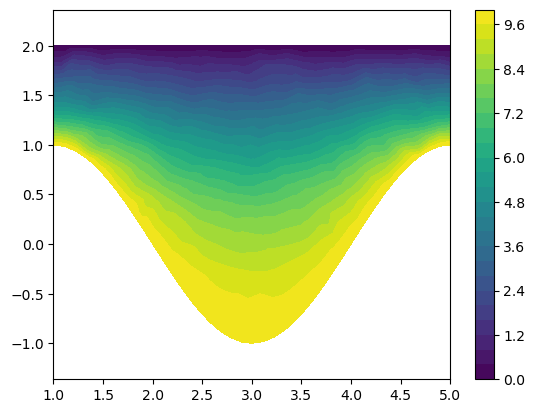

In [3]:
df_x_y = pd.read_csv("./domains/domain_1_1/mesh001/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_1_1/mesh001/Test_domain_1_1_sin_mesh_001_solution.csv")
df_elements = pd.read_csv("./domains/domain_1_1/mesh001/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;


triangulation = tri.Triangulation(df_x_y["x"].values, df_x_y["y"].values, triangles=df_elements.values)
plt.tricontourf(triangulation, df_z["sol"].values, levels=25)
# show
#plot_fem_mesh(df_x_y["x"].values, df_x_y["y"].values, df_elements.values)

plt.colorbar()
plt.axis('equal')
plt.show()


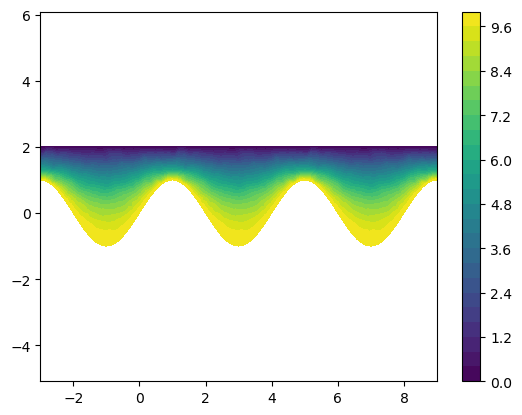

In [4]:
df_x_y = pd.read_csv("./domains/domain_1_1/mesh001/mesh_nodes.csv")
df_z = pd.read_csv("./output/domain_1_1/mesh001/Test_domain_1_1_sin_mesh_001_solution.csv")
df_elements = pd.read_csv("./domains/domain_1_1/mesh001/mesh_polygons.csv")
for element in df_elements.values:
    element -= 1;


nodes_x = df_x_y["x"].values
tmp = df_x_y["x"].values - 4
nodes_x = np.concatenate((nodes_x, tmp), axis=0)
tmp = df_x_y["x"].values + 4
nodes_x = np.concatenate((nodes_x, tmp), axis=0)

nodes_y = np.concatenate(( df_x_y["y"].values,  df_x_y["y"].values), axis=0)
nodes_y = np.concatenate(( nodes_y,  df_x_y["y"].values), axis=0)

z_val = np.concatenate(( df_z["sol"].values, df_z["sol"].values), axis=0)
z_val = np.concatenate(( z_val, df_z["sol"].values), axis=0)

k = np.max(df_elements.values) + 1
triangles = df_elements.values
triangles = np.concatenate((triangles,  df_elements.values + k ), axis=0)
triangles = np.concatenate((triangles,  df_elements.values + k + k ), axis=0)


triangulation = tri.Triangulation(nodes_x, nodes_y, triangles=triangles)
plt.tricontourf(triangulation, z_val,levels=25)
# show
#plot_fem_mesh(nodes_x, nodes_y, triangles, 0.05)

plt.colorbar()
plt.axis('equal')
plt.show()

